In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(13)

### Данные

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

<Figure size 640x480 with 0 Axes>

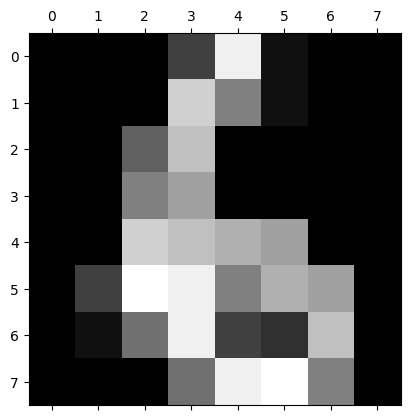

6


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

### Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

* $z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$
* $a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$

Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial w} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot x_i = (a-y_i) \cdot x_i $$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial b} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot 1 = a-y_i $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [7]:
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
m, n = X_train.shape
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 1383
Размерность объекта: 64


<Figure size 640x480 with 0 Axes>

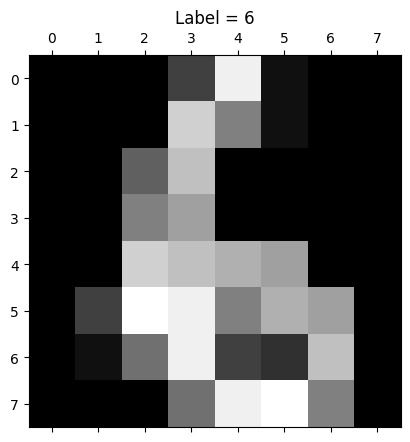

Train: 1383 samples, 64 features;  Test: 414 samples
Iteration    0: loss = 0.6931
Iteration  200: loss = 0.3043
Iteration  400: loss = 0.2644
Iteration  600: loss = 0.2544
Iteration  800: loss = 0.2498
Iteration 1000: loss = 0.2478
Iteration 1200: loss = 0.2467
Iteration 1400: loss = 0.2460
Iteration 1600: loss = 0.2454
Iteration 1800: loss = 0.2450


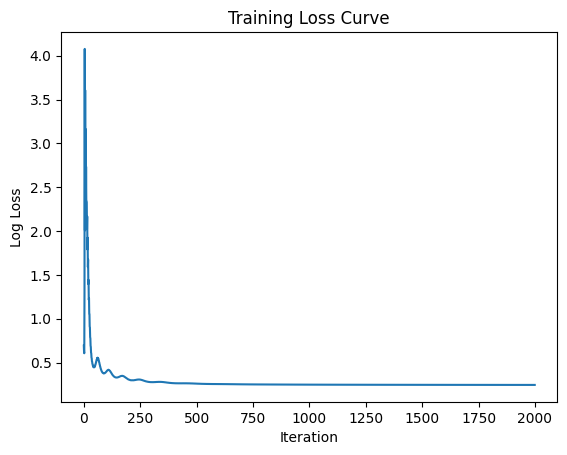

Test Accuracy: 0.8816



In [14]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(13)

# подгружаем цифры и делаем бинарную задачу: 1—если цифра ≥5, иначе 0
data = load_digits()
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

plt.gray()
idx = np.random.randint(0, len(X))
plt.matshow(X[idx].reshape(8, 8))
plt.title(f"Label = {data.target[idx]}")
plt.show()

# 2 разбиваем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.77,
    shuffle=True,
    random_state=13
)

m, n = X_train.shape
print(f"Train: {m} samples, {n} features;  Test: {X_test.shape[0]} samples")

# 3 Инициализация параметров
w = np.zeros(n)    # вектор весов
b = 0.0            # свободный член

# гиперпараметры
lr = 0.01          # скорость обучения
num_iters = 2000   # число шагов градиентного спуска

# 4 функции
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss_and_grads(X, y, w, b):
    """
    Вычисляет лог-лосс и его градиенты по w и b на выборке X,y.
    """
    m = X.shape[0]
    z = X.dot(w) + b
    a = sigmoid(z)
    # loss
    loss = - np.mean(y * np.log(a + 1e-15) + (1 - y) * np.log(1 - a + 1e-15))
    # градиенты
    dz = a - y
    dw = (1/m) * X.T.dot(dz)
    db = np.mean(dz)
    return loss, dw, db

# 5 градиентный спуск
loss_history = []

for i in range(num_iters):
    loss, dw, db = compute_loss_and_grads(X_train, y_train, w, b)
    w -= lr * dw
    b -= lr * db
    loss_history.append(loss)
    if i % 200 == 0:
        print(f"Iteration {i:4d}: loss = {loss:.4f}")

# 6 кривая обучения
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Training Loss Curve")
plt.show()

# 7 Оценка на тесте
z_test = X_test.dot(w) + b
a_test = sigmoid(z_test)
y_pred = (a_test >= 0.5).astype(int)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

